# Bank data analysis (Long term bank deposit)

The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  
Make feature engineering but also try differnet models in order to get as much accuracy as possible.


1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

# 1. Data Loading

In [1]:
import pandas as pd
import sklearn
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv', sep=';', header=0)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


This data set is consisted of data about bank clients, their main features, and their responce to a campaign about subscription to term deposit. The class is their responce.

In [4]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns")
for column in df.columns:
    if is_numeric_dtype(df[column]):
        print(column)
print("----------------------------------")        
print("Category columns")        
for column in df.columns:
    if is_string_dtype(df[column]):
        print(column)

Numeric columns
age
duration
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
----------------------------------
Category columns
job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


Overall the data set is conisted of categorical and nominal data with the same proportion 50% numerical and 50% categorical data.

In [5]:
missing = df.isnull().sum()
print(missing)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In this data set there are no missing values, but still for some of the client there are some unknown features, later on in this model this unknown value will be accordingly preprocessed

# 2. Explanatory Data Analysis - EDA

## Univariate Analysis

In [3]:
df['y'].value_counts()


no     36548
yes     4640
Name: y, dtype: int64

Text(0.5, 1.0, 'Class')

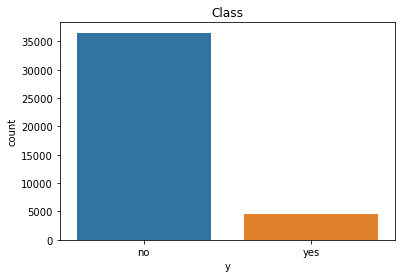

In [4]:
ax = sns.countplot(df['y'])
ax.set_title('Class')

Y column is the target of this  data set, the possible outcomes are No and Yes. No means that the client will not subscribe 
to a term deposit and Yes is the opposite, the client will decide to subscribe to this service. From the above visualisation we
can consulde that the is huge imbalance in our target class. Most of the data this data set has are with outcome No which means the client decides not to use this service.

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

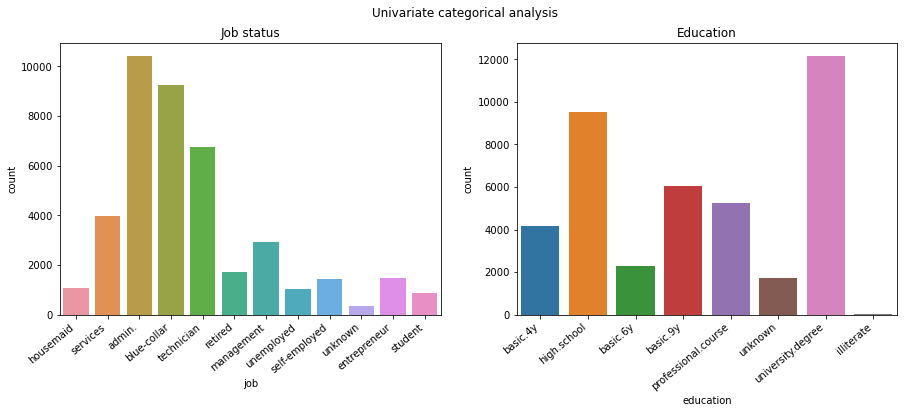

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Univariate categorical analysis')

ax = sns.countplot(ax = axes[0], x = df.job)
axes[0].set_title('Job status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax2 = sns.countplot(ax = axes[1],x = df.education)
axes[1].set_title('Education')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

Further we continiue with univariate analysis of the features first of the categorical data. Job status has 11 professions that are being targeted for this campaign. We can notice that employees from Administration sector, Blue Collar, and Technicians were the most targeted, and this continiues with employeed in services sector and managenent. This might be due to the fact that Anministration and blue collar sectors employee large number of employees, or this is the bank's structure of clients. When it comes to education status most of the targeted clients had University degree and continiues with clients with high school. Both features Job status and Education have unknown value for some of the clients

Text(0.5, 1.0, 'Marital Status')

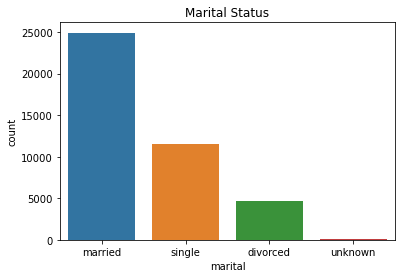

In [9]:
sns.countplot(x = df.marital).set_title('Marital Status')

The next feature is about Marital Status and it can be noticed that the clients from our data set are married. 

Text(0.5, 1.0, 'Loan in Default')

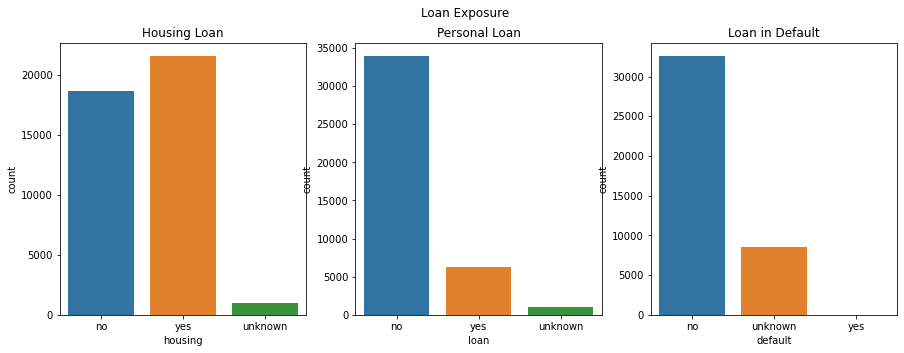

In [10]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
fig.suptitle('Loan Exposure')

ax = sns.countplot(ax = axes[0], x = df.housing)
axes[0].set_title('Housing Loan')

sns.countplot(ax = axes[1], x = df.loan)
axes[1].set_title('Personal Loan')

sns.countplot(ax = axes[2], x = df.default)
axes[2].set_title('Loan in Default')


When it comes to loan exposure than it can be noticed that most of the clients in out dataset are clients that do not have 
personal loan and their exposure is not in default. When it comes to housing loan than the distribution is the same between 
client that have and clients that do not have housing loan. 

Text(0.5, 1.0, 'Last contact day of the week')

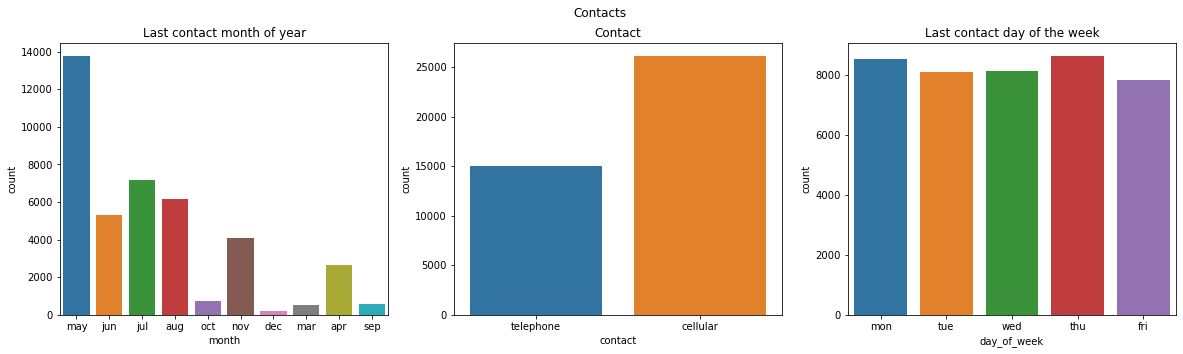

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Contacts')

ax = sns.countplot(ax = axes[0], x = df.month)
axes[0].set_title('Last contact month of year')
sns.countplot(ax = axes[1], x = df.contact)
axes[1].set_title('Contact')
sns.countplot(ax = axes[2], x = df.day_of_week)
axes[2].set_title('Last contact day of the week')

The next featue in the data set are features about the period in which the client was contacted, month and day and 
communication channel. It can be noticed that most of the client were contacted between may and august, during the whole working week and mainly on mobile phone.

Text(0.5, 1.0, 'Number of previous contacts')

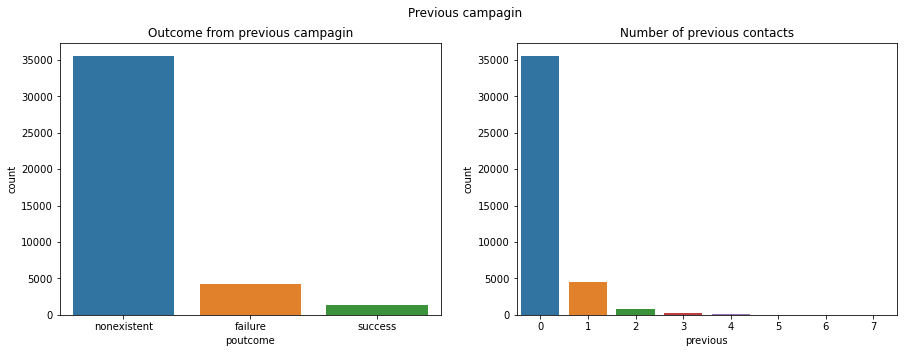

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Previous campagin')

plt.subplot(121)
sns.countplot(df['poutcome']).set_title('Outcome from previous campagin')

plt.subplot(122)
sns.countplot(df['previous']).set_title('Number of previous contacts')


Most of the clients in this data set were not previously contacted during other previous campagins.

Text(0.5, 1.0, 'Number of days that passed by after the client was last contacted')

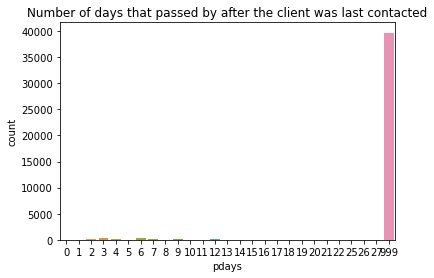

In [13]:
ax = sns.countplot(df['pdays'])
ax.set_title('Number of days that passed by after the client was last contacted')

This feature shows as well that most of the client were not contacted before this campagin.

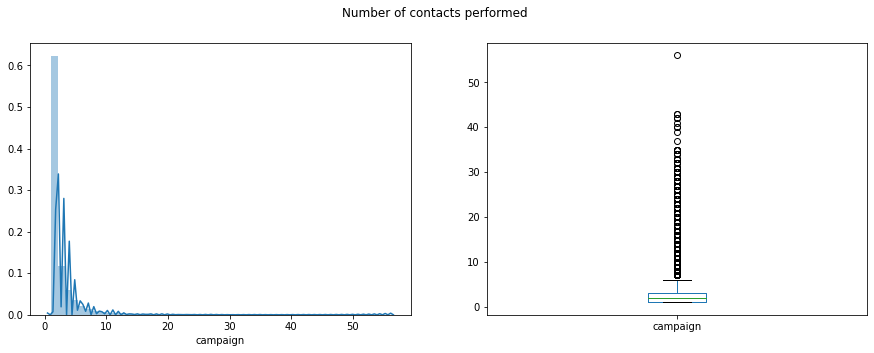

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Number of contacts performed')

plt.subplot(121)
sns.distplot(df['campaign'])

plt.subplot(122)
df['campaign'].plot(kind='box')

The above plot shows distribution of number of contacts performed during this campaign. It can be noticed that the main 
distribution is between  and  contacts. At the same time this feature has higher number of outliers. 

# log transformation to eliminate 'skew' effect

In [15]:
df = df.assign(campaign = np.log(df['campaign']+0.1))

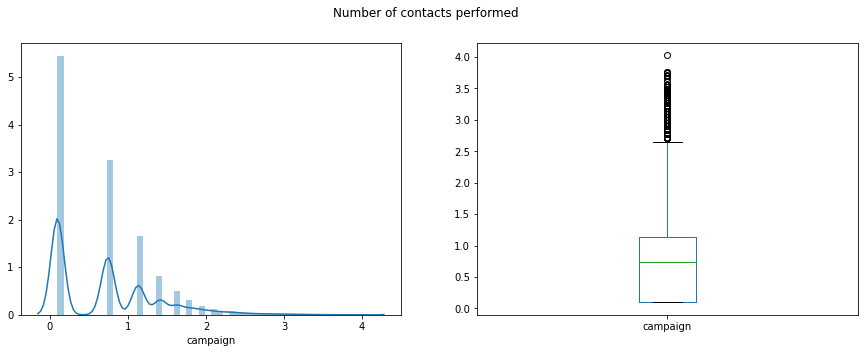

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Number of contacts performed')

plt.subplot(121)
sns.distplot(df['campaign'])

plt.subplot(122)
df['campaign'].plot(kind='box')

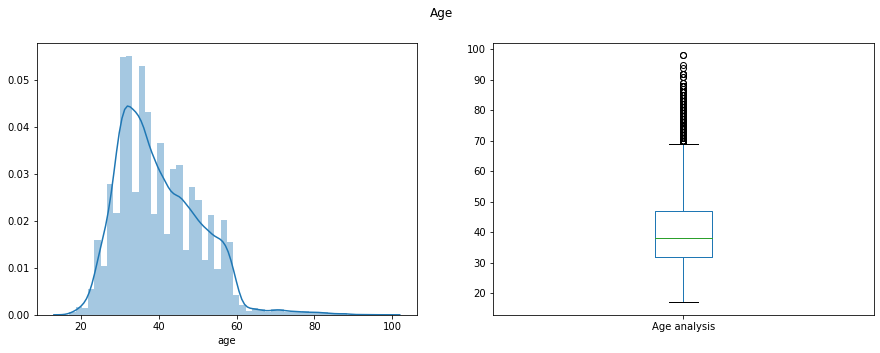

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Age')

plt.subplot(121)
sns.distplot(df['age'], label='Age')

plt.subplot(122)
df['age'].plot(kind='box', label="Age analysis")

The above shown plot shows distribution of client's age, mainly follows normal distribution, and has some number of 
outliers

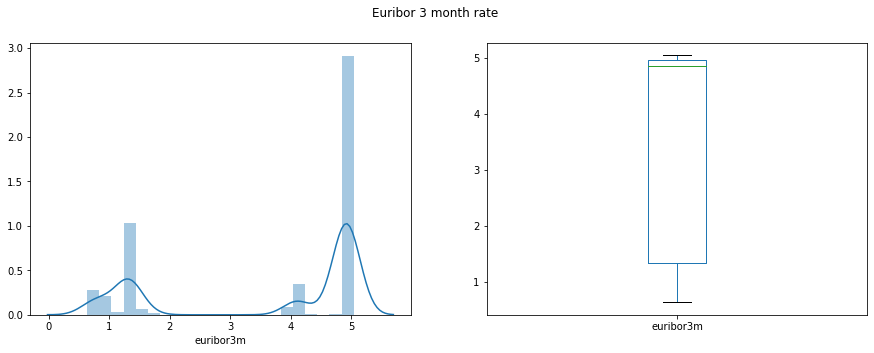

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Euribor 3 month rate')

plt.subplot(121)
sns.distplot(df['euribor3m'], label='euribor3m')

plt.subplot(122)
df['euribor3m'].plot(kind='box', label="euribor3m")

The above plot shows distribution of euribor 3 month rate. Euribor rates are based on the average 
interest rates at which a large panel of European banks borrow funds from one another. The rate for term deposit is 
determinated by Euribor rate

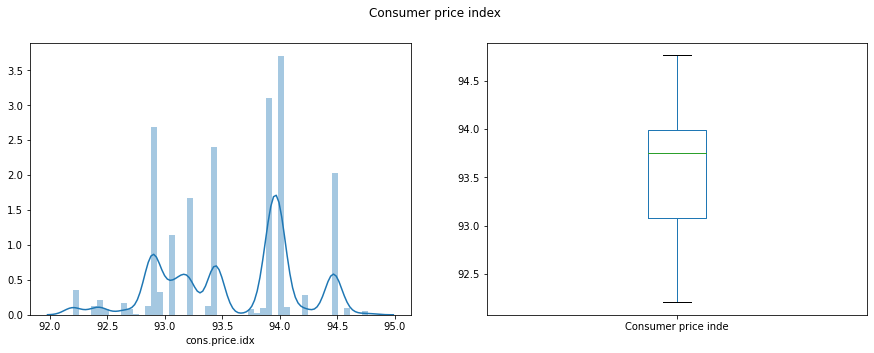

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Consumer price index')

plt.subplot(121)
sns.distplot(df['cons.price.idx'], label='Consumer price inde')

plt.subplot(122)
df['cons.price.idx'].plot(kind='box', label="Consumer price inde")

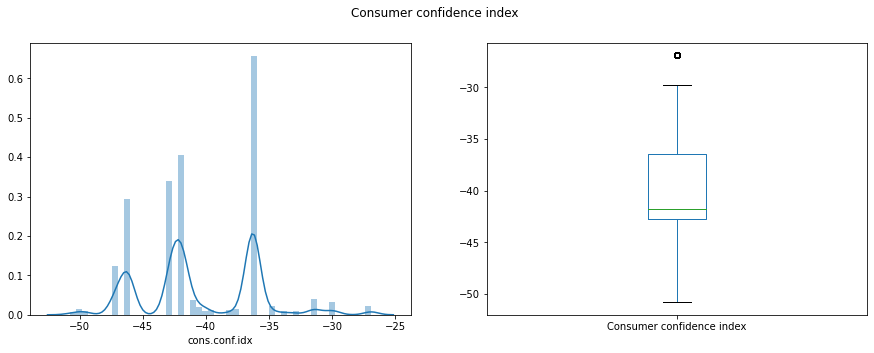

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Consumer confidence index')

plt.subplot(121)
sns.distplot(df['cons.conf.idx'], label='Consumer confidence index')

plt.subplot(122)
df['cons.conf.idx'].plot(kind='box', label="Consumer confidence index")

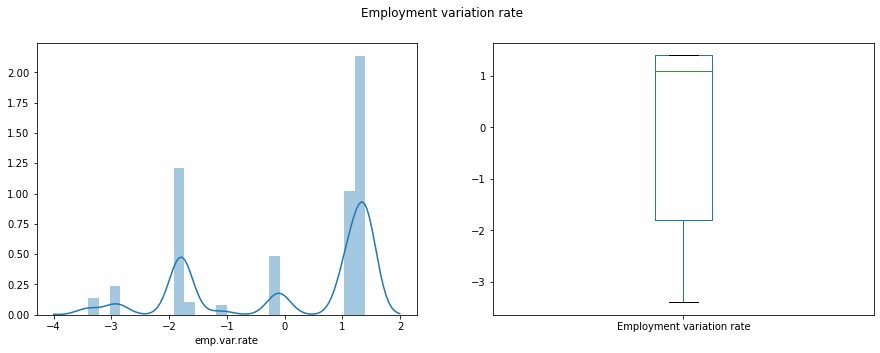

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Employment variation rate')

plt.subplot(121)
sns.distplot(df['emp.var.rate'], label='Employment variation rate')

plt.subplot(122)
df['emp.var.rate'].plot(kind='box', label="Employment variation rate")

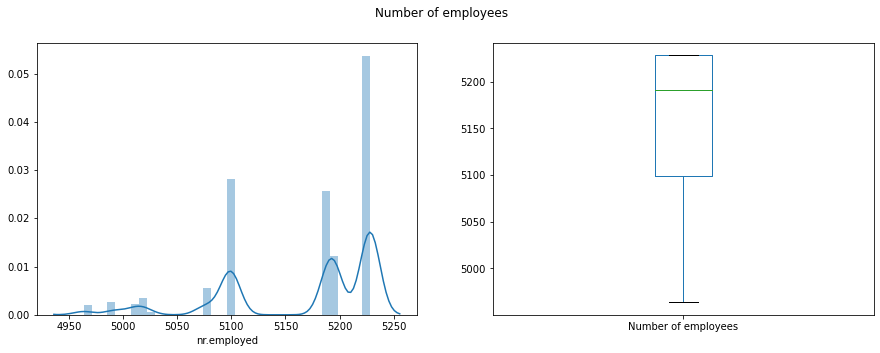

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Number of employees')

plt.subplot(121)
sns.distplot(df['nr.employed'], label='Number of employees')

plt.subplot(122)
df['nr.employed'].plot(kind='box', label='Number of employees')

## Bivariate Analysis

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

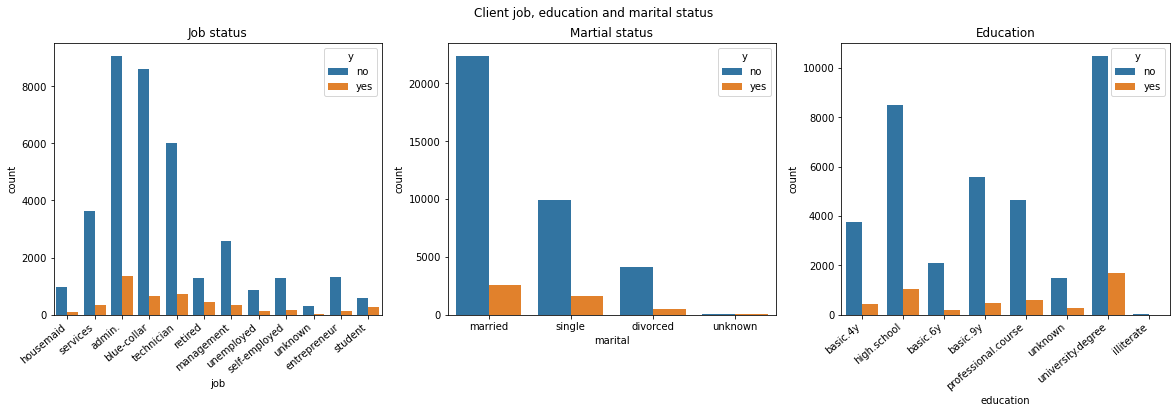

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Client job, education and marital status')

ax1 = sns.countplot(ax = axes[0], x = df.job, hue='y', data = df)
axes[0].set_title('Job status')
axes[0].set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

ax2 = sns.countplot(ax = axes[1], x = df.marital, hue='y', data = df)
axes[1].set_title('Martial status')

ax3 = sns.countplot(ax = axes[2], x = df.education, hue='y', data = df)
axes[2].set_title('Education')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")



In this analysis it is shown the job status, marital status and education status of our clients devided in two categories, client that subscribed to term deposit and clients that did not. It can be noticed that both groups of clients follow simular pattern. Most of the clients that subscribed to term deposit are clients employeed in Amisnistration, Technician and Blue Collar (simular as their over all distibution), mainly married people decided to subscribe and mostly people with higher education ( university degree) followed by clients that have high school education. 


Text(0.5, 1.0, 'Personal Loan')

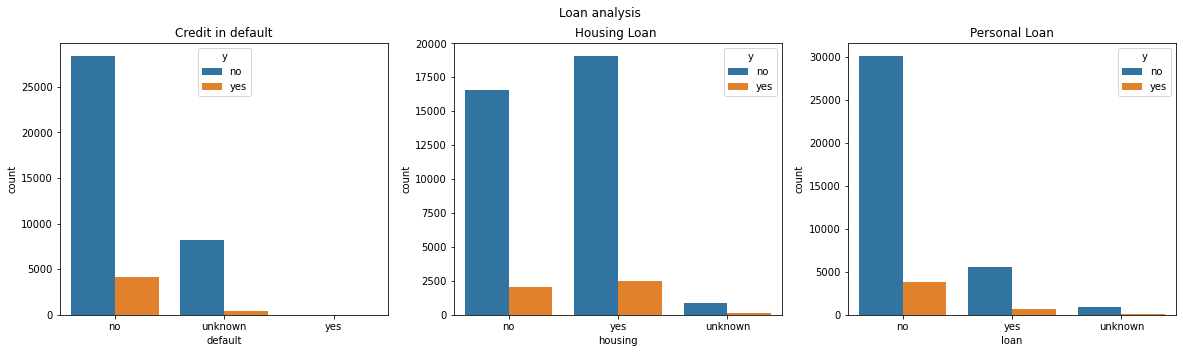

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Loan analysis')

ax1 = sns.countplot(ax = axes[0], x = df.default, hue='y', data = df)
axes[0].set_title('Credit in default')
ax2 = sns.countplot(ax = axes[1], x = df.housing, hue='y', data = df)
axes[1].set_title('Housing Loan ')
ax3_3 = sns.countplot(ax = axes[2], x = df.loan, hue='y', data = df)
axes[2].set_title('Personal Loan')


When it comes to loan exposure than it can be noticed that most of the clients that subscribed to term deposit are clients that do not have 
personal loan and their exposure is not in default. When it comes to housing loan than most of the client that subscribed as well have housing loan.

Text(0.5, 1.0, 'Last contact -  Day od week ')

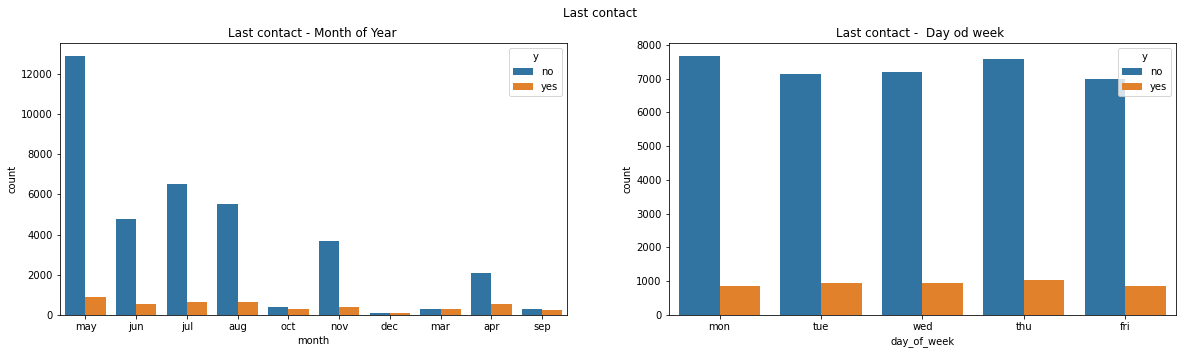

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Last contact')

ax1 = sns.countplot(ax = axes[0], x = df.month, hue='y', data = df)
axes[0].set_title('Last contact - Month of Year ')

ax2 = sns.countplot(ax = axes[1], x = df.day_of_week, hue='y', data = df)
axes[1].set_title('Last contact -  Day od week ')

Most of the clients that decided to subscribe to the above mentioned service (term deposit) did that between the months may and august even though the biggest campaign was in may, and it was done approximately the same every day of the working days.


Text(0.5, 1.0, 'Number of previous contacts')

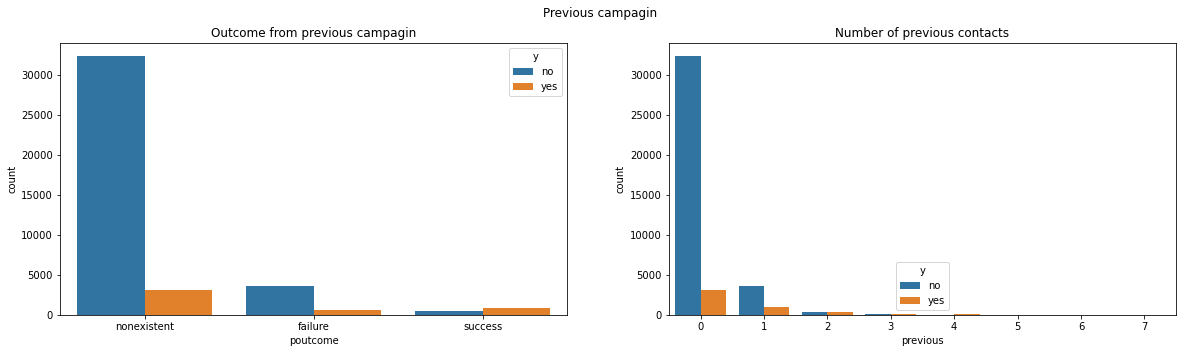

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Previous campagin')

ax1 = sns.countplot(ax = axes[0], x = df.poutcome, hue='y', data = df)
axes[0].set_title('Outcome from previous campagin')

ax2 = sns.countplot(ax = axes[1], x = df.previous, hue='y', data = df)
axes[1].set_title('Number of previous contacts')

Most of the clients that decided to subscribe to the above mentioned service (term deposit) were not previously contacted, but still there are come that decided to subscribe during this campaign even though the previous campaign was not successful.

Text(0.5, 1.0, 'Number of contacts performed no class')

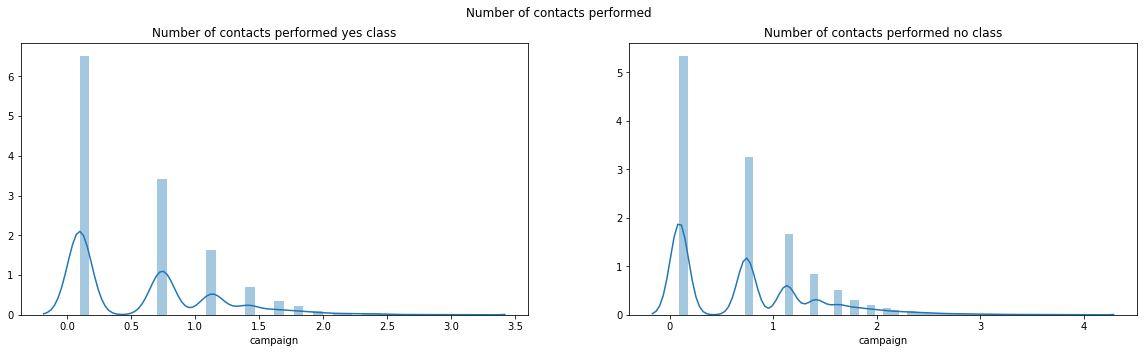

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Number of contacts performed ')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['campaign']).set_title('Number of contacts performed yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['campaign']).set_title('Number of contacts performed no class')



The distribution of number of contact performed by client during this campaign is the same for both clasess yes and no. This feature did not infulenced very much client's decision. 

Text(0.5, 1.0, 'Euribor no class')

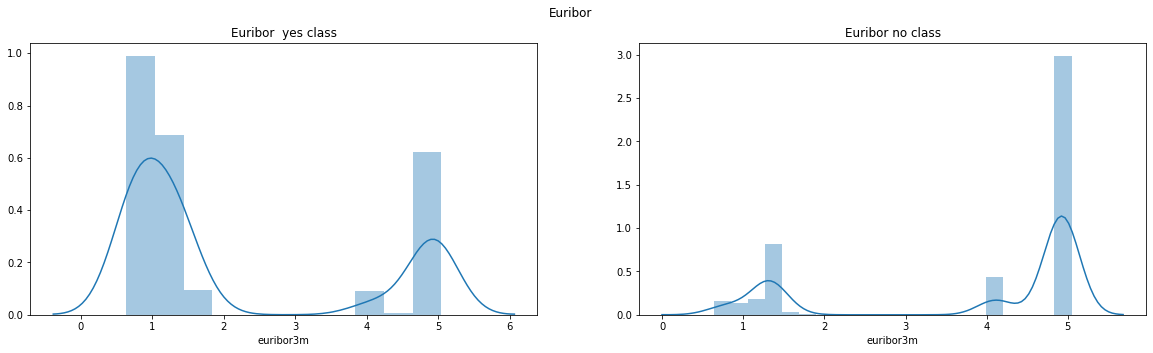

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Euribor')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['euribor3m']).set_title('Euribor  yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['euribor3m']).set_title('Euribor no class')



Text(0.5, 1.0, 'Consumer confidence index no class')

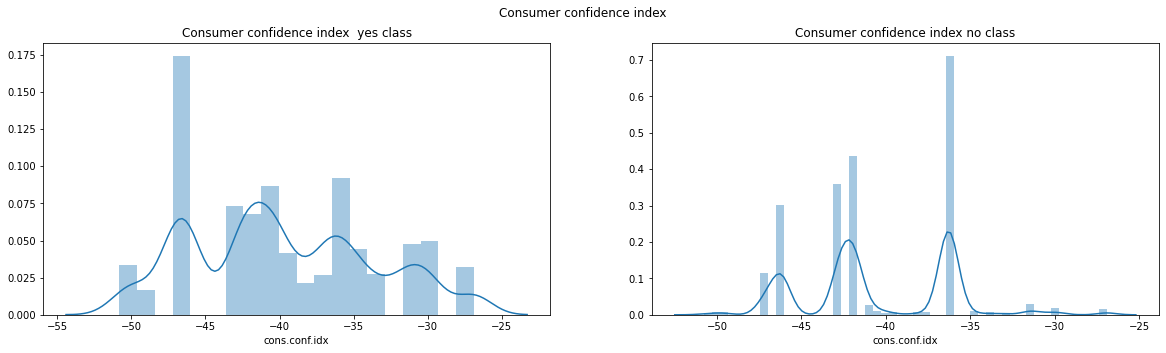

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Consumer confidence index')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['cons.conf.idx']).set_title('Consumer confidence index  yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['cons.conf.idx']).set_title('Consumer confidence index no class')





Text(0.5, 1.0, 'Consumer price index no class')

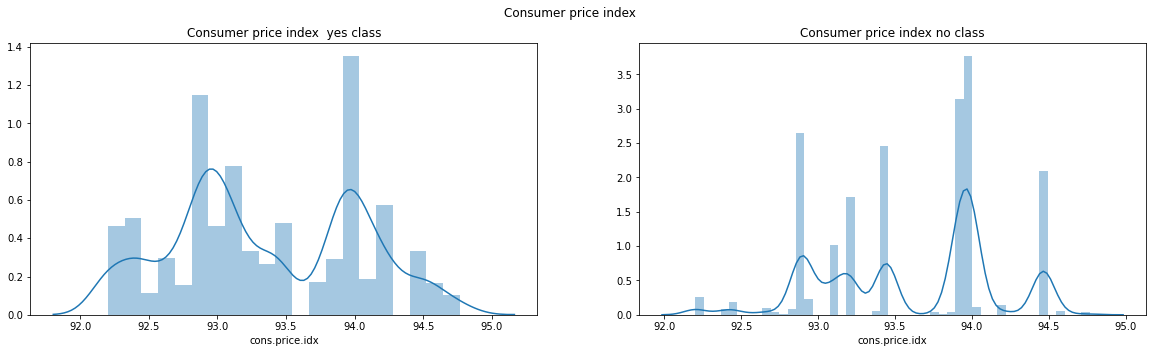

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Consumer price index')

plt.subplot(121)
class_yes= df.query('y == "yes"')
sns.distplot(class_yes['cons.price.idx']).set_title('Consumer price index  yes class')

plt.subplot(122)
class_no= df.query('y != "yes"')
sns.distplot( class_no['cons.price.idx']).set_title('Consumer price index no class')


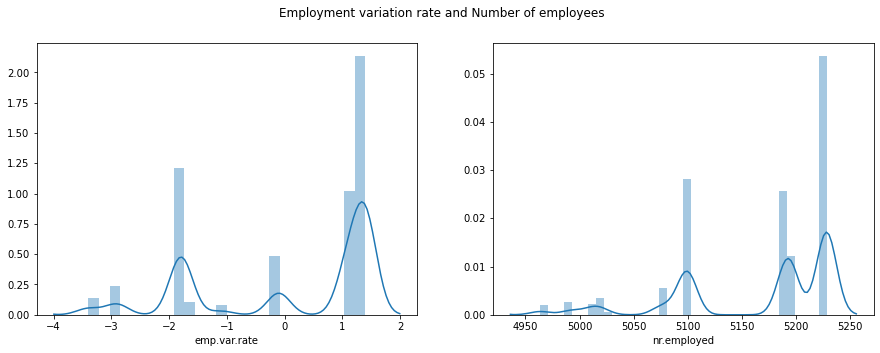

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Employment variation rate and Number of employees')

plt.subplot(121)
sns.distplot(df['emp.var.rate'], label='Employment variation rate')

plt.subplot(122)
sns.distplot(df['nr.employed'], label='Number of employees')